<a href="https://colab.research.google.com/github/alubillijyaneswarrao-creator/MachineLearningModels/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE CLASSIFIER

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('pacific.csv')
df.head()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

(26137, 22)

In [6]:
print(df.isna().sum())

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64


In [8]:
num_col = df.select_dtypes(include=['number']).columns
df[num_col] = df[num_col].fillna(df[num_col].mean())

cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
  df[col] = df[col].fillna(df[col]).mode()[0]
print(df.isna().sum())

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64


In [10]:
le = LabelEncoder()
for col in cat_col:
  df[col] = le.fit_transform(df[col])
print(df)

       ID  Name      Date  Time  Event  Status  Latitude  Longitude  \
0       0     0  19490611     0      0       0         0          0   
1       0     0  19490611   600      0       0         0          0   
2       0     0  19490611  1200      0       0         0          0   
3       0     0  19490611  1800      0       0         0          0   
4       0     0  19490612     0      0       0         0          0   
...    ..   ...       ...   ...    ...     ...       ...        ...   
26132   0     0  20151128  1200      0       0         0          0   
26133   0     0  20151128  1800      0       0         0          0   
26134   0     0  20151129     0      0       0         0          0   
26135   0     0  20151129   600      0       0         0          0   
26136   0     0  20151129  1200      0       0         0          0   

       Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0                45              -999  ...         -999         -999   
1  

In [12]:
target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
model = DecisionTreeClassifier(max_depth = 5,random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
#model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy",accuracy)

              precision    recall  f1-score   support

        -999       1.00      1.00      1.00      3952
           0       1.00      0.98      0.99      1038
          10       0.44      0.35      0.39        23
          15       0.76      0.70      0.73        40
          20       0.73      0.82      0.77        79
          25       0.81      0.50      0.62        26
          30       0.55      0.83      0.66        36
          35       0.00      0.00      0.00         4
          40       0.37      1.00      0.54        14
          45       0.00      0.00      0.00         6
          50       0.00      0.00      0.00         3
          60       0.00      0.00      0.00         4
          65       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1

    accuracy                           0.98      5228
   macro avg       0.38      0.41      0.38      5228
weighted avg       0.98   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


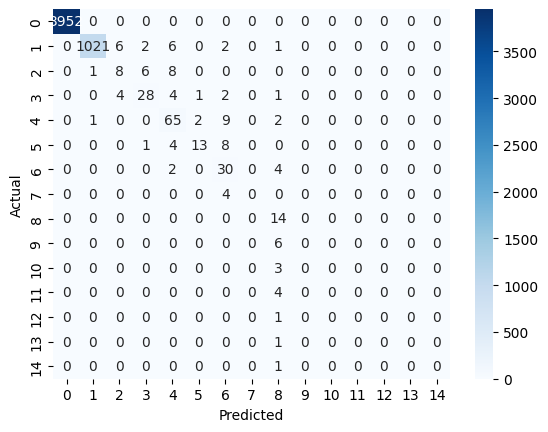

In [34]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

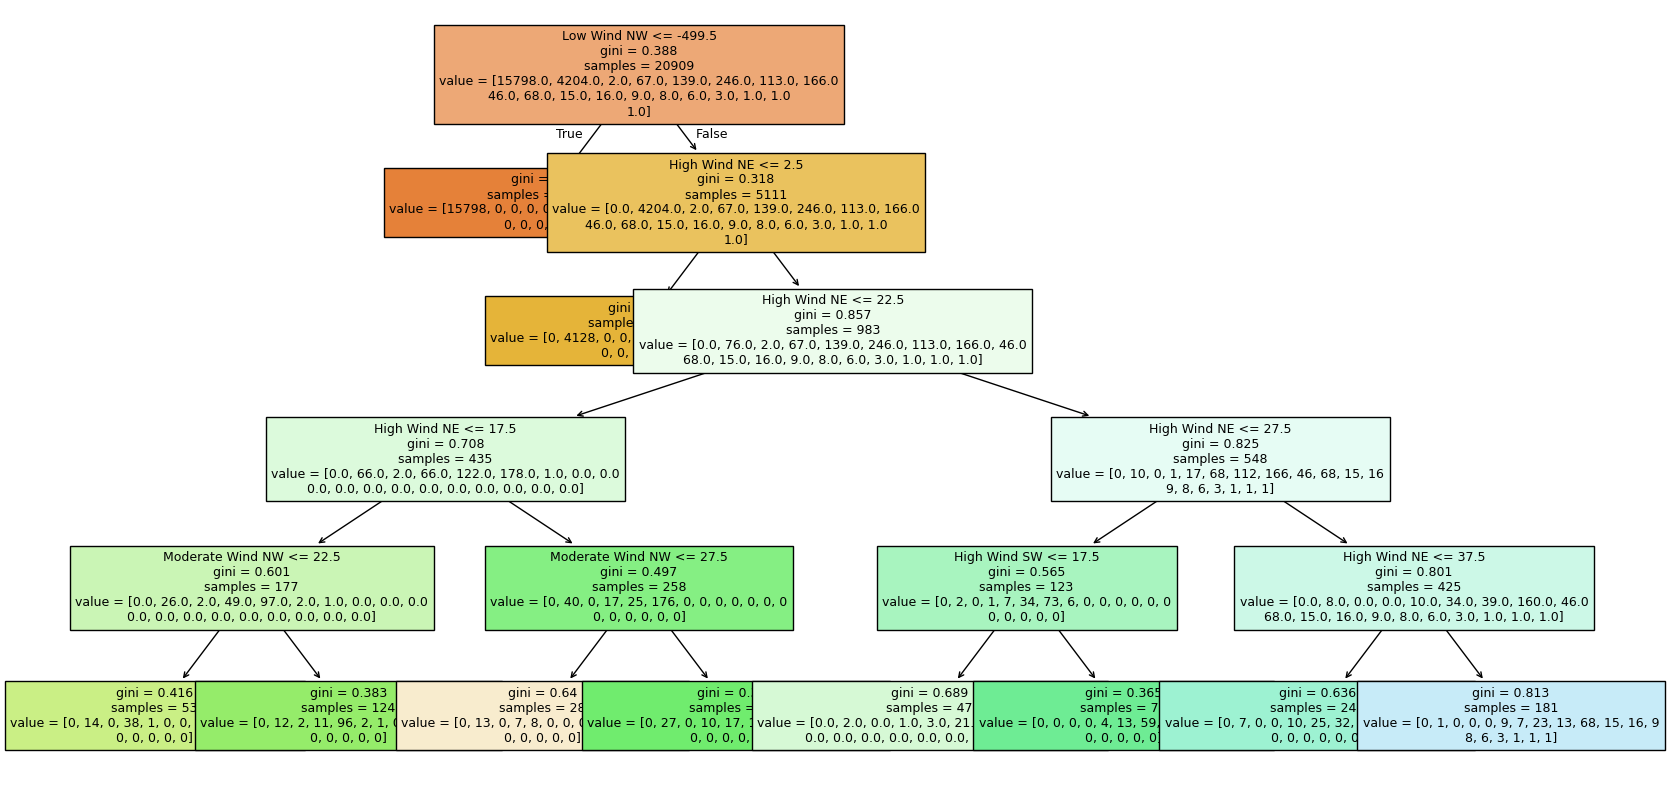

In [36]:
#Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=X.columns,filled=True,fontsize=9) #u can adjust the font size so boxes dont overlap
plt.show()